In [ ]:
pip install surprise

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier



from surprise.model_selection import train_test_split, cross_validate
from surprise import SVD, Reader, Dataset

import numpy as np
from surprise import SVD, KNNBasic, Dataset, Reader
from surprise.model_selection import KFold
from surprise import accuracy
# Importar librerías necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Librerías de Scikit-learn
from sklearn import datasets
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier


In [2]:
"""dataframe = Dataset_Classe()
dataframe.load_dataset()
dataframe.clear_dataset()
df = dataframe.get_dataset()"""

df = pd.read_csv("ratings_Electronics.csv",
                             names=['userId', 'productId','rating','timestamp'])
print(df.shape[0])

7824482


In [ ]:
dict = {}
for n in range (df.shape[0]):
    if df.iloc[n]['userId'] in dict.items():
        dict[df.iloc[n]['userId']] += 1
    else:
        dict[df.iloc[n]['userId']] = 1

In [ ]:
df_save = df
df = df_save
print(df.head())

In [ ]:
print("Total Reviews:",df.shape[0])
print("Total Columns:",df.shape[1])

In [ ]:
# Estadístiques dels ratings
print("\nEstadístiques dels ratings:")
print("Minimum rating:", df["rating"].min())
print("Maximum rating:", df["rating"].max())

In [ ]:
print("Total number of ratings :",df.rating.nunique())
print("Total number of users   :", df.userId.nunique())
print("Total number of products  :", df.productId.nunique())

In [ ]:
df.info()

In [ ]:
# Check missing value
df.isnull().sum()

In [ ]:
# Check Duplicate data
df[df.duplicated()].any()

In [ ]:
# rating describe summary 
df.describe()['rating']

In [ ]:
print("Unique value of Rating:",df.rating.unique())

In [ ]:
# Find the minimum and maximum ratings
print('Minimum rating is: %d' %(df.rating.min()))
print('Maximum rating is: %d' %(df.rating.max()))

In [ ]:
# Average rating of products
ratings = pd.DataFrame(df.groupby('productId')['rating'].mean())
ratings['ratings_count'] = pd.DataFrame(df.groupby('productId')['rating'].count())
ratings['ratings_average'] = pd.DataFrame(df.groupby('productId')['rating'].mean())
ratings.head(10)

In [ ]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

In [ ]:
sns.jointplot(x='rating',y='ratings_count',data=ratings,alpha=0.5)

In [ ]:
# Most top 30 products
popular_products = pd.DataFrame(df.groupby('productId')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(30).plot(kind = "bar",figsize=(12, 4))

In [ ]:
user_votes = pd.DataFrame(df.groupby('userId')['rating'].count())
users_filter = user_votes[user_votes['rating'] >= 50]

print("Usuarios con más de 50 votos:", users_filter.count())

items_votes = pd.DataFrame(df.groupby('productId')['rating'].count())
items_filter = items_votes[items_votes['rating'] >= 20]

print("Items con más de 5 votos:", items_filter.count())

In [4]:
user_counts = df['userId'].value_counts()
product_counts = df['productId'].value_counts()
filtered_dataset = df[
    (df['userId'].isin(user_counts[user_counts >= 50].index)) &
    (df['productId'].isin(product_counts[product_counts >= 5].index))
]
filtered_dataset.shape

print("Total number of ratings :",filtered_dataset['rating'].nunique())
print("Total number of users   :", filtered_dataset['userId'].nunique())
print("Total number of products  :", filtered_dataset['productId'].nunique())
print(filtered_dataset['userId'].value_counts())


Total number of ratings : 5
Total number of users   : 1540
Total number of products  : 39939
userId
ADLVFFE4VBT8      468
A5JLAU2ARJ0BO     463
A3OXHLG6DIBRW8    456
A6FIAB28IS79      412
A680RUE1FDO8B     381
                 ... 
A1XEQGYY1IL8CD     34
AD8DLOGHAXL        34
A2NT3W1F1XYBFZ     33
A16CVJUQOB6GIB     31
A3MV1KKHX51FYT     20
Name: count, Length: 1540, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general de gráficos
sns.set(style="whitegrid")

# 1. Distribución del número de ratings por usuario
plt.figure(figsize=(10, 5))
sns.histplot(filtered_dataset['userId'].value_counts(), bins=30, kde=False, color='skyblue')
plt.title('Distribución del número de ratings por usuario')
plt.xlabel('Número de ratings')
plt.ylabel('Cantidad de usuarios')
plt.show()

# 2. Distribución del número de ratings por producto
plt.figure(figsize=(10, 5))
sns.histplot(filtered_dataset['productId'].value_counts(), bins=30, kde=False, color='orange')
plt.title('Distribución del número de ratings por producto')
plt.xlabel('Número de ratings')
plt.ylabel('Cantidad de productos')
plt.show()

# 3. Calificaciones promedio por producto
avg_ratings = filtered_dataset.groupby('productId')['rating'].mean()
plt.figure(figsize=(10, 5))
sns.histplot(avg_ratings, bins=30, kde=True, color='green')
plt.title('Distribución de calificaciones promedio por producto')
plt.xlabel('Calificación promedio')
plt.ylabel('Cantidad de productos')
plt.show()


In [ ]:
# Users que passen el filtre
'''filtered_users = df[df['userId'].isin(users_filter.index)]

#Items que passen el filtre
filtered_dataset = filtered_users[filtered_users['productId'].isin(items_filter.index)]'''

#
print("Tamaño del dataset después de aplicar los filtros:")
print(filtered_dataset.shape)

print("Total number of ratings :",filtered_users.rating.nunique())
print("Total number of users   :", filtered_users.userId.nunique())
print("Total number of products  :", filtered_users.productId.nunique())

In [ ]:
print(filtered_dataset.shape)
sns.countplot(data=filtered_dataset, x='rating', palette='viridis')
plt.title("Distribució dels ratings")
plt.xlabel("Rating")
plt.ylabel("Nombre de valoracions")
plt.show()
print(filtered_dataset.shape)

In [ ]:
user_activity = filtered_dataset.groupby('userId')['rating'].count()
sns.histplot(user_activity, kde=False, bins=30, color='skyblue')
plt.title("Distribució de l'activitat dels usuaris")
plt.xlabel("Nombre de valoracions per usuari")
plt.ylabel("Nombre d'usuaris")
plt.show()

In [ ]:
item_popularity = filtered_dataset.groupby('productId')['rating'].count()
sns.histplot(item_popularity, kde=False, bins=30, color='orange')
plt.title("Popularitat dels productes")
plt.xlabel("Nombre de valoracions per producte")
plt.ylabel("Nombre de productes")
plt.show()


In [ ]:
user_product_matrix = filtered_dataset.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)
subset_matrix = user_product_matrix.iloc[:100, :100]  # Subset per visualizació
sns.heatmap(subset_matrix, cmap="YlGnBu", cbar=True)
plt.title("Heatmap d'interacció usuari-producte")
plt.xlabel("ProductId")
plt.ylabel("UserId")
plt.show()


In [ ]:
user_product_matrix.shape

In [ ]:
#Matriu correlació
# Convertir 'userId' y 'productId' a valores numéricos (esto puede no tener sentido si solo son identificadores)
import copy
matrix_corr_dataset = copy.deepcopy(filtered_dataset)
matrix_corr_dataset['userId_encoded'] = matrix_corr_dataset['userId'].astype('category').cat.codes
matrix_corr_dataset['productId_encoded'] = matrix_corr_dataset['productId'].astype('category').cat.codes

# Ahora calculamos la correlación entre 'userId_encoded', 'productId_encoded' y 'rating'
df_numeric = matrix_corr_dataset[['userId_encoded', 'productId_encoded', 'rating']]

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)
print(filtered_dataset.shape)

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Título
plt.title('Matriz de Correlación de las Características', fontsize=15)

# Mostrar el gráfico
plt.show()

In [ ]:
reader = Reader()
data = Dataset.load_from_df(filtered_dataset[['userId', 'productId', 'rating']], reader)

In [ ]:
svd = SVD()

# Convierte el dataset en un objeto "DatasetAutoFolds" que puede dividirse
full_trainset = data.build_full_trainset()
trainset, testset = train_test_split(data, test_size=0.2)

In [ ]:
trainset = data.build_full_trainset()
start_time = time.time()
svd.fit(trainset)
pred = svd.test(testset)
execution_time_svd = time.time() - start_time
##esto important nos da las evaluaciones tipo lo que sería más el predict

In [5]:
veces = filtered_dataset['userId'].value_counts()

In [6]:
filtered_counts = filtered_dataset['userId'].value_counts()
filtered_counts = filtered_counts[filtered_counts >= 50]

                 userId   productId  rating   timestamp
118       AT09WGFUM934H  0594481813     3.0  1377907200
177      A32HSNCNPRUMTR  0970407998     1.0  1319673600
178      A17HMM1M7T9PJ1  0970407998     4.0  1281744000
492      A3CLWR1UUZT6TG  0972683275     5.0  1373587200
631      A3TAS1AG6FMBQW  0972683275     5.0  1353456000
...                 ...         ...     ...         ...
7824423  A34BZM6S9L7QI4  B00LGQ6HL8     5.0  1405555200
7824424  A1G650TTTHEAL5  B00LGQ6HL8     5.0  1405382400
7824425  A25C2M3QF9G7OQ  B00LGQ6HL8     5.0  1405555200
7824426   A1E1LEVQ9VQNK  B00LGQ6HL8     5.0  1405641600
7824427  A2NYK9KWFMJV4Y  B00LGQ6HL8     5.0  1405209600

[107263 rows x 4 columns]
userId
ADLVFFE4VBT8      468
A5JLAU2ARJ0BO     463
A3OXHLG6DIBRW8    456
A6FIAB28IS79      412
A680RUE1FDO8B     381
                 ... 
A1ZPUEHF4AES86     50
AR1T36GLLAFFX      50
AW6FQE5QRF2LM      50
A1FOSIV4TWZFR7     50
AN0JK8OQLUC55      50
Name: count, Length: 1320, dtype: int64


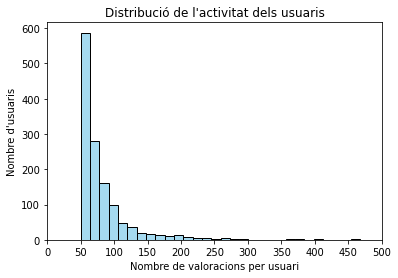

In [7]:
filtered_counts
# Obtener los IDs de usuarios que cumplen la condición
user_ids_of_interest = filtered_counts.index

# Filtrar el DataFrame original
filtered_dataset = filtered_dataset[filtered_dataset['userId'].isin(user_ids_of_interest)]
print(filtered_dataset)
print(filtered_dataset['userId'].value_counts())
user_activity = filtered_dataset.groupby('userId')['rating'].count()
sns.histplot(user_activity, kde=False, bins=30, color='skyblue')
plt.title("Distribució de l'activitat dels usuaris")
plt.xlabel("Nombre de valoracions per usuari")
plt.ylabel("Nombre d'usuaris")
plt.xticks(range(0, user_activity.max() + 50, 50))
plt.show()

In [ ]:
# Check specific userId review
filtered_dataset[filtered_dataset['userId'] == 'A3LDPF5FMB782Z']

In [ ]:
print(svd.predict('A3LDPF5FMB782Z', '1400501776'))
filtre = filtered_dataset[filtered_dataset['userId'] == 'A3LDPF5FMB782Z']
filtre[filtre['productId'] == '1400501776']['rating']

User-user

In [ ]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

# Define el rango de las valoraciones del dataset
reader = Reader(rating_scale=(1, 5))

# Convierte el dataset filtrado en formato Surprise
data = Dataset.load_from_df(filtered_dataset[['userId', 'productId', 'rating']], reader)

# Convierte el dataset en un objeto "DatasetAutoFolds" que puede dividirse
full_trainset = data.build_full_trainset()
trainset, testset = train_test_split(data, test_size=0.2)



In [ ]:
#Distancia cosinus
sim_options_cosinus = {'name': 'cosine', 'user_based': True}
#Distancia pearson 
sim_options_pearson = {'name': 'pearson', 'user_based': True}
#Distancia cosinus
sim_options_cosinus_items = {'name': 'cosine', 'user_based': False}
#Distancia pearson 
sim_options_pearson_items = {'name': 'pearson', 'user_based': False}

In [ ]:
#Model cosinus
model_cosinus = KNNBasic(sim_options=sim_options_cosinus)
model_cosinus_item = KNNBasic(k = 10, sim_options=sim_options_cosinus_items)
# Realizar validación cruzada con 5 particiones
#results_cosine = cross_validate(model_cosinus, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

start_time = time.time()
model_cosinus.fit(trainset)
predictions_cosinus_user = model_cosinus.test(testset)
execution_time_c_u = time.time() - start_time

# Evaluar el modelo en el testset (hacer predicciones)
start_time = time.time()
model_cosinus_item.fit(trainset)
predictions_cosinus_user_item = model_cosinus_item.test(testset)
execution_time_c_i = time.time() - start_time

In [ ]:
from surprise import KNNBasic
import time


k_values = list(range(1, 51))  # Valores de K de 1 a 50
rmse_values = []
mae_values = []
execution_times = []

# Probar diferentes valores de K
for k in k_values:
    # Configuración del modelo KNN con el valor de K actual
    sim_options = {'name': 'cosine', 'user_based': False}
    model = KNNBasic(k=k, sim_options=sim_options)
    
    # Ajustar el modelo y hacer predicciones
    model.fit(trainset)
    predictions = model.test(testset)
    
    # Calcular RMSE y MAE
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    
    # Guardar los resultados
    rmse_values.append(rmse)
    mae_values.append(mae)
    
    elapsed_time = time.time() - start_time
    execution_times.append(elapsed_time)

# Graficar RMSE y MAE
plt.figure(figsize=(18, 8))

# RMSE
plt.subplot(1, 3, 1)
plt.plot(k_values, rmse_values, label='RMSE', color='blue', marker='o')
plt.title('Item-Item dist cosinus: Evolución de RMSE con K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('RMSE')
plt.grid(True)

# MAE
plt.subplot(1, 3, 2)
plt.plot(k_values, mae_values, label='MAE', color='green', marker='o')
plt.title('Item-Item dist cosinus: Evolución de MAE con K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('MAE')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(k_values, execution_times, label='Temps d\'Execució', color='red', marker='o')
plt.title('Temps d\'Execució vs K')
plt.xlabel('K (Número de Veïns)')
plt.ylabel('Temps d\'Execució (segons)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import time

k_values = list(range(1, 25))  # Valores de K de 1 a 50
rmse_values = []
mae_values = []
execution_times = []

# Probar diferentes valores de K
for k in k_values:
    # Configuración del modelo KNN con el valor de K actual
    sim_options = {'name': 'pearson', 'user_based': False}
    model = KNNBasic(k=k, sim_options=sim_options)
    
    start_time = time.time()
    
    # Ajustar el modelo y hacer predicciones
    model.fit(trainset)
    predictions = model.test(testset)
    
    # Calcular RMSE y MAE
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    
    # Guardar los resultados
    rmse_values.append(rmse)
    mae_values.append(mae)
    
    elapsed_time = time.time() - start_time
    execution_times.append(elapsed_time)

# Graficar RMSE y MAE
plt.figure(figsize=(18, 8))

# RMSE
plt.subplot(1, 3, 1)
plt.plot(k_values, rmse_values, label='RMSE', color='blue', marker='o')
plt.title('Item-Item dist pearson: Evolució de RMSE amb K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('RMSE')
plt.grid(True)

# MAE
plt.subplot(1, 3, 2)
plt.plot(k_values, mae_values, label='MAE', color='green', marker='o')
plt.title('Item-Item dist pearson: Evolució de MAE amb K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('MAE')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(k_values, execution_times, label='Temps d\'Execució', color='red', marker='o')
plt.title('Temps d\'Execució vs K')
plt.xlabel('K (Número de Veïns)')
plt.ylabel('Temps d\'Execució (segons)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import time

k_values = list(range(1, 25))  # Valores de K de 1 a 50
rmse_values = []
mae_values = []
execution_times = []

# Probar diferentes valores de K
for k in k_values:
    # Configuración del modelo KNN con el valor de K actual
    sim_options = {'name': 'cosine', 'user_based': True}
    model = KNNBasic(k=k, sim_options=sim_options)
    
    start_time = time.time()

    
    # Ajustar el modelo y hacer predicciones
    model.fit(trainset)
    predictions = model.test(testset)
    
    # Calcular RMSE y MAE
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    
    # Guardar los resultados
    rmse_values.append(rmse)
    mae_values.append(mae)
    
    elapsed_time = time.time() - start_time
    execution_times.append(elapsed_time)

# Graficar RMSE y MAE
plt.figure(figsize=(18, 8))

# RMSE
plt.subplot(1, 3, 1)
plt.plot(k_values, rmse_values, label='RMSE', color='blue', marker='o')
plt.title('User-User dist cosinus: Evolució de RMSE amb K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('RMSE')
plt.grid(True)

# MAE
plt.subplot(1, 3, 2)
plt.plot(k_values, mae_values, label='MAE', color='green', marker='o')
plt.title('User-User dist cosinus: Evolución de MAE amb K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('MAE')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(k_values, execution_times, label='Temps d\'Execució', color='red', marker='o')
plt.title('Temps d\'Execució vs K')
plt.xlabel('K (Número de Veïns)')
plt.ylabel('Temps d\'Execució (segons)')
plt.grid(True)


plt.tight_layout()
plt.show()

In [ ]:
import time

k_values = list(range(1, 25))  # Valores de K de 1 a 50
rmse_values = []
mae_values = []
execution_times = []

# Probar diferentes valores de K
for k in k_values:
    # Configuración del modelo KNN con el valor de K actual
    sim_options = {'name': 'pearson', 'user_based': True}
    model = KNNBasic(k=k, sim_options=sim_options)
    
    start_time = time.time()
    
    # Ajustar el modelo y hacer predicciones
    model.fit(trainset)
    predictions = model.test(testset)
    
    # Calcular RMSE y MAE
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    
    elapsed_time = time.time() - start_time
    execution_times.append(elapsed_time)
    
    # Guardar los resultados
    rmse_values.append(rmse)
    mae_values.append(mae)
    

# Graficar RMSE y MAE
plt.figure(figsize=(18, 8))

# RMSE
plt.subplot(1, 3, 1)
plt.plot(k_values, rmse_values, label='RMSE', color='blue', marker='o')
plt.title('User-User dist pearson: Evolució de RMSE amb K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('RMSE')
plt.grid(True)

# MAE
plt.subplot(1, 3, 2)
plt.plot(k_values, mae_values, label='MAE', color='green', marker='o')
plt.title('User-User dist pearson: Evolució de MAE amb K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('MAE')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(k_values, execution_times, label='Temps d\'Execució', color='red', marker='o')
plt.title('Temps d\'Execució vs K')
plt.xlabel('K (Número de Veïns)')
plt.ylabel('Temps d\'Execució (segons)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#print(predictions_cosinus_user_item)

In [ ]:
# Evaluar el RMSE en las predicciones del testset
rmse_c_u = accuracy.rmse(predictions_cosinus_user)
print(f'RMSE en el testset: {rmse}')

# Evaluar el MAE en las predicciones del testset
mae_c_u = accuracy.mae(predictions_cosinus_user)
print(f'MAE en el testset: {mae}')

# Evaluar el RMSE en las predicciones del testset
rmse_c_i = accuracy.rmse(predictions_cosinus_user_item)
print(f'RMSE en el testset: {rmse}')

# Evaluar el MAE en las predicciones del testset
mae_c_i = accuracy.mae(predictions_cosinus_user_item)
print(f'MAE en el testset: {mae}')

##Visualización cosinus cual es mejor si item-item o user-user
import matplotlib.pyplot as plt

# Datos simulados de las métricas
models = ['User-User', 'Item-Item']
rmse_values = [rmse_c_u, rmse_c_i]  # RMSE para User-User y Item-Item
mae_values = [mae_c_u, mae_c_i]   # MAE para User-User y Item-Item

# Gráfico 1: Comparación de RMSE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color=['blue', 'green'])
plt.title('Comparació de RMSE entre User-User y Item-Item', fontsize=14)
plt.ylabel('RMSE', fontsize=12)
plt.ylim(0, 1.25)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: Comparación de MAE
plt.subplot(1, 2, 2)
plt.bar(models, mae_values, color=['blue', 'green'])
plt.title('Comparació de MAE entre User-User y Item-Item', fontsize=14)
plt.ylabel('MAE', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los gráficos
plt.tight_layout()
plt.show()
print("Veiem que RMSE: El modelo Item-Item tiene un RMSE ligeramente más bajo (mejor) que el User-User. MAE: De manera similar, Item-Item también tiene un MAE más bajo, indicando que produce predicciones más precisas en promedio")

In [ ]:
rmse_c_u = accuracy.rmse(predictions_cosinus_user)
mae_c_u = accuracy.mae(predictions_cosinus_user)

rmse_c_i = accuracy.rmse(predictions_cosinus_user_item)
mae_c_i = accuracy.mae(predictions_cosinus_user_item)

rmse_svd = accuracy.rmse(pred)
mae_svd = accuracy.mae(pred)

# Visualització de RMSE i MAE
models = ['User-User', 'Item-Item', 'SVD']
rmse_values = [rmse_c_u, rmse_c_i, rmse_svd]
mae_values = [mae_c_u, mae_c_i, mae_svd]

plt.figure(figsize=(12, 5))

# Gràfica de RMSE
plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color=['blue', 'green', 'red'])
plt.title('Comparació de RMSE entre models', fontsize=14)
plt.ylabel('RMSE', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gràfica de MAE
plt.subplot(1, 2, 2)
plt.bar(models, mae_values, color=['blue', 'green', 'red'])
plt.title('Comparació de MAE entre models', fontsize=14)
plt.ylabel('MAE', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Gràfica de temps d'execució
execution_times = [execution_time_c_u, execution_time_c_i, execution_time_svd]
plt.figure(figsize=(6, 5))
plt.bar(models, execution_times, color=['blue', 'green', 'red'])
plt.title('Temps d\'Execució entre Models', fontsize=14)
plt.ylabel('Temps (segons)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from collections import defaultdict

def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """
    Calcula Precision@K y Recall@K para las predicciones dadas.
    """
    # Mapear cada usuario a los ítems recomendados y relevantes
    user_recs = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        user_recs[uid].append((iid, est))
    
    # Ordenar las predicciones por calificación estimada
    for uid, user_ratings in user_recs.items():
        user_recs[uid] = sorted(user_ratings, key=lambda x: x[1], reverse=True)[:k]
    
    precisions = {}
    recalls = {}
    for uid, user_ratings in user_recs.items():
        # Calcular ítems relevantes y recomendados
        relevant = [iid for (iid, est) in user_ratings if est >= threshold]
        relevant_total = sum((true_r >= threshold) for (_, _, true_r, _, _) in predictions if _ == uid)
        
        # Precision y Recall
        precisions[uid] = len(relevant) / k if k > 0 else 0
        recalls[uid] = len(relevant) / relevant_total if relevant_total > 0 else 0
    
    return precisions, recalls

# Calcular Precision@K y Recall@K SVD
precisions_svd, recalls_svd = precision_recall_at_k(pred, k=10, threshold=3.5)
# Promedio de las métricas
avg_precision_svd = sum(precisions_svd.values()) / len(precisions_svd)
avg_recall_svd = sum(recalls_svd.values()) / len(recalls_svd)

# Calcular Precision@K y Recall@K USER-USER
precisions_c_u, recalls_c_u = precision_recall_at_k(predictions_cosinus_user, k=10, threshold=3.5)
# Promedio de las métricas
avg_precision_c_u = sum(precisions_c_u.values()) / len(precisions_c_u)
avg_recall_c_u = sum(recalls_c_u.values()) / len(recalls_c_u)

# Calcular Precision@K y Recall@K USER-USER
precisions_c_i, recalls_c_i = precision_recall_at_k(predictions_cosinus_user_item, k=10, threshold=3.5)
# Promedio de las métricas
avg_precision_c_i = sum(precisions_c_i.values()) / len(precisions_c_i)
avg_recall_c_i = sum(recalls_c_i.values()) / len(recalls_c_i)
print(f'Precision@10: {avg_precision_svd:.4f}')
print(f'Recall@10: {avg_recall_svd:.4f}')
print(f'Precision@10: {avg_precision_c_u:.4f}')
print(f'Recall@10: {avg_recall_c_u:.4f}')
print(f'Precision@10: {avg_precision_c_i:.4f}')
print(f'Recall@10: {avg_recall_c_i:.4f}')

In [ ]:
# Datos de ejemplo para gráficos (cambiar por valores reales)
models = ['User-User', 'Item-Item', 'SVD']
precision_values = [avg_precision_c_u, avg_precision_c_i, avg_precision_svd]  # Sustituir avg_precision con el valor real de SVD
recall_values = [avg_recall_c_u, avg_recall_c_i, avg_recall_svd]       # Sustituir avg_recall con el valor real de SVD

# Gráfico comparativo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(models, precision_values, color=['blue', 'green', 'red'])
plt.title('Precision@10 Comparación', fontsize=14)
plt.ylabel('Precision@10', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.bar(models, recall_values, color=['blue', 'green', 'red'])
plt.title('Recall@10 Comparación', fontsize=14)
plt.ylabel('Recall@10', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
def precision_recall_by_k(predictions, max_k=20, threshold=3.5):
    """
    Calcula Precision@K y Recall@K para valores de K desde 1 hasta max_k.
    """
    precision_at_k = []
    recall_at_k = []

    for k in range(1, max_k + 1):
        precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=threshold)
        avg_precision = sum(precisions.values()) / len(precisions)
        avg_recall = sum(recalls.values()) / len(recalls)
        
        precision_at_k.append(avg_precision)
        recall_at_k.append(avg_recall)

    return precision_at_k, recall_at_k

# Calcular para SVD
max_k = 20
precision_k_svd, recall_k_svd = precision_recall_by_k(pred, max_k=max_k)
precision_k_c_i, recall_k_c_i = precision_recall_by_k(predictions_cosinus_user_item, max_k=max_k)
precision_k_c_u, recall_k_c_u = precision_recall_by_k(predictions_cosinus_user, max_k=max_k)
# (Repite este cálculo para User-User e Item-Item si es necesario)
# Valores de K
k_values = list(range(1, max_k + 1))

# Graficar Precision@K
plt.figure(figsize=(12, 6))
plt.plot(k_values, precision_k_svd, label='SVD', marker='o', color='red')
plt.plot(k_values, precision_k_c_u, label='User-User', marker='o', color='blue')
plt.plot(k_values, precision_k_c_i, label='Item-Item', marker='o', color='green')
plt.title('Evolución de Precision@K en función de K', fontsize=14)
plt.xlabel('K', fontsize=12)
plt.ylabel('Precision@K', fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Graficar Recall@K
plt.figure(figsize=(12, 6))
plt.plot(k_values, recall_k_svd, label='SVD', marker='o', color='red')
plt.plot(k_values, recall_k_c_u, label='User-User', marker='o', color='blue')
plt.plot(k_values, recall_k_c_i, label='Item-Item', marker='o', color='green')
plt.title('Evolución de Recall@K en función de K', fontsize=14)
plt.xlabel('K', fontsize=12)
plt.ylabel('Recall@K', fontsize=12)
plt.legend()
plt.grid()
plt.show()


In [ ]:
#Model cosinus
model_cosinus_i = KNNBasic(sim_options=sim_options_cosinus_items)
model_cosinus_u = KNNBasic(sim_options=sim_options_cosinus)
model_pearson_u = KNNBasic(sim_options=sim_options_pearson)
model_pearson_i = KNNBasic(sim_options=sim_options_pearson_items)
# Realizar validación cruzada con 5 particiones
#results_cosine = cross_validate(model_cosinus, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Evaluar el modelo en el testset (hacer predicciones)
model_cosinus_i.fit(trainset)
model_cosinus_u.fit(trainset)
model_pearson_u.fit(trainset)
model_pearson_i.fit(trainset)

predictions_cosinus_i = model_cosinus_i.test(testset)
predictions_cosinus_u = model_cosinus_u.test(testset)
predictions_person_u = model_pearson_u.test(testset)
predictions_person_i = model_pearson_i.test(testset)
pred = svd.test(testset)

##COSINUS
# Evaluar el RMSE en las predicciones del testset
rmse_cosinus_u = accuracy.rmse(predictions_cosinus_u)
print(f'RMSE con similitud de Pearson en el testset: {rmse_cosinus_u}')

# Evaluar el MAE en las predicciones del testset
mae_cosinus_u = accuracy.mae(predictions_cosinus_u)
print(f'MAE con similitud de Pearson en el testset: {mae_cosinus_u}')

##PEARSON
# Evaluar el RMSE en las predicciones del testset
rmse_pearson_u = accuracy.rmse(predictions_person_u)
print(f'RMSE con similitud de Pearson en el testset: {rmse_pearson_u}')

# Evaluar el MAE en las predicciones del testset
mae_pearson_u = accuracy.mae(predictions_person_u)
print(f'MAE con similitud de Pearson en el testset: {mae_pearson_u}')

In [ ]:
###USERUSER WHICH IS BETTER?? PREARSON O COSINUS

##Visualización cosinus cual es mejor si item-item o user-user
import matplotlib.pyplot as plt

# Datos simulados de las métricas
models = ['Pearson', 'Cosinus']
rmse_values = [rmse_pearson_u, rmse_cosinus_u]  # RMSE para User-User y Item-Item
mae_values = [mae_pearson_u, mae_cosinus_u]   # MAE para User-User y Item-Item

# Gráfico 1: Comparación de RMSE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color=['skyblue', 'orange'])
plt.title(' User-User: Comparació de RMSE entre Pearson Vs Cosinus', fontsize=14)
plt.ylabel('RMSE', fontsize=12)
plt.ylim(0, 1.25)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: Comparación de MAE
plt.subplot(1, 2, 2)
plt.bar(models, mae_values, color=['skyblue', 'orange'])
plt.title('User-User: Comparació de MAE entre Pearson Vs Cosinus', fontsize=14)
plt.ylabel('MAE', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [ ]:
##ITEMSITEMS WHICH IS BETTER PEARSON O COSINUS??
#Model cosinus
model_cosinus_i = KNNBasic(sim_options=sim_options_cosinus_items)
model_pearson_i = KNNBasic(sim_options=sim_options_pearson_items)
# Realizar validación cruzada con 5 particiones
#results_cosine = cross_validate(model_cosinus, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Evaluar el modelo en el testset (hacer predicciones)
model_cosinus_i.fit(trainset)
model_pearson_i.fit(trainset)
predictions_cosinus_i = model_cosinus_i.test(testset)
predictions_person_i = model_pearson_i.test(testset)

##COSINUS
# Evaluar el RMSE en las predicciones del testset
rmse_cosinus_i = accuracy.rmse(predictions_cosinus_i)
print(f'RMSE con similitud de Pearson en el testset: {rmse_cosinus_i}')

# Evaluar el MAE en las predicciones del testset
mae_cosinus_i = accuracy.mae(predictions_cosinus_i)
print(f'MAE con similitud de Pearson en el testset: {mae_cosinus_i}')

##PEARSON
# Evaluar el RMSE en las predicciones del testset
rmse_pearson_i = accuracy.rmse(predictions_person_i)
print(f'RMSE con similitud de Pearson en el testset: {rmse_pearson_i}')

# Evaluar el MAE en las predicciones del testset
mae_pearson_i = accuracy.mae(predictions_person_i)
print(f'MAE con similitud de Pearson en el testset: {mae_pearson_i}')

##Visualización cosinus cual es mejor si item-item o user-user
import matplotlib.pyplot as plt

# Datos simulados de las métricas
models = ['Pearson', 'Cosinus']
rmse_values = [rmse_pearson_i, rmse_cosinus_i]  # RMSE para User-User y Item-Item
mae_values = [mae_pearson_i, mae_cosinus_i]   # MAE para User-User y Item-Item

# Gráfico 1: Comparación de RMSE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color=['skyblue', 'orange'])
plt.title(' Items: Comparació de RMSE entre Pearson Vs Cosinus', fontsize=14)
plt.ylabel('RMSE', fontsize=12)
plt.ylim(0, 1.25)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: Comparación de MAE
plt.subplot(1, 2, 2)
plt.bar(models, mae_values, color=['skyblue', 'orange'])
plt.title('Items: Comparació de MAE entre Pearson Vs Cosinus', fontsize=14)
plt.ylabel('MAE', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [ ]:
#Model Pearson
model_pearson = KNNBasic(sim_options=sim_options_pearson)

# Realizar validación cruzada con 5 particiones
#results_pearson = cross_validate(model_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Evaluar el modelo en el testset (hacer predicciones)
model_pearson.fit(trainset)
predictions_pearson_user = model_pearson.test(testset)

In [ ]:
# Evaluar el RMSE en las predicciones del testset
rmse_pearson = accuracy.rmse(predictions_pearson_user)
print(f'RMSE con similitud de Pearson en el testset: {rmse_pearson}')

# Evaluar el MAE en las predicciones del testset
mae_pearson = accuracy.mae(predictions_pearson_user)
print(f'MAE con similitud de Pearson en el testset: {mae_pearson}')


Projecte:
ordre
user user
500 lines
cosinus 
pearson


In [ ]:
###Funcionnnnnns#####
from surprise import accuracy
from sklearn.metrics import ndcg_score
import numpy as np

def calculate_ndcg(predictions, k=10):
    """Calcula el NDCG per a un conjunt de prediccions."""
    true_relevance = []
    scores = []
    
    for uid, iid, true_r, est, _ in predictions:
        true_relevance.append(true_r)
        scores.append(est)

    # Transformar en format compatible amb sklearn.metrics.ndcg_score
    true_relevance = np.array([true_relevance])  # Ha de ser 2D
    scores = np.array([scores])  # Ha de ser 2D

    return ndcg_score(true_relevance, scores, k=k)

def calculate_mrr(predictions):
    """Calcula el Mean Reciprocal Rank (MRR) per a les prediccions."""
    reciprocal_ranks = []

    for uid, iid, true_r, est, _ in predictions:
        rank = 1.0 / (1 + abs(true_r - est))  # Reciprocal rank basat en la diferència
        reciprocal_ranks.append(rank)

    return np.mean(reciprocal_ranks)

def precision_at_k(predictions, k=10):
    """Calcula la precisió@K."""
    top_k = sorted(predictions, key=lambda x: x[3], reverse=True)[:k]  # Ordenar per est
    relevant = [1 if true_r >= 4 else 0 for uid, iid, true_r, est, _ in top_k]

    return sum(relevant) / k

def recall_at_k(predictions, k=10):
    """Calcula el recall@K."""
    top_k = sorted(predictions, key=lambda x: x[3], reverse=True)[:k]
    relevant = [1 if true_r >= 4 else 0 for uid, iid, true_r, est, _ in top_k]
    total_relevant = sum(1 for uid, iid, true_r, est, _ in predictions if true_r >= 4)

    return sum(relevant) / total_relevant if total_relevant > 0 else 0

In [ ]:
#User-User
#Matriu agafem aleatoriament 500 files.
#similaritats:
# - cosinus
# - pearson
#Evaluació errors:
# - RMSE MAE NDCG MRR Precision@k Recall@k

In [ ]:
#filtered_dataset Matriu filtrada dels usuaris. 
# 1. Matriu agafem aleatoriament 500 files.
unique_users = filtered_dataset['userId'].unique()

#Seleccionar aleatoriamente 500 usuarios (o menos si hay menos usuarios disponibles)
selected_users = np.random.choice(unique_users, size=min(500, len(unique_users)), replace=False)

#Filtrar el DataFrame para mantener solo los usuarios seleccionados
dataset_500 = filtered_dataset[filtered_dataset['userId'].isin(selected_users)]
dataset_500.shape
print("Total number of users:", dataset_500.userId.nunique())

In [ ]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(dataset_500[['userId', 'productId', 'rating']], reader)
# Convierte el dataset filtrado en formato Surprise
# Convierte el dataset en un objeto "DatasetAutoFolds" que puede dividirse
full_trainset = data.build_full_trainset()
trainset, testset = train_test_split(data, test_size=0.2)

##COSINUS
model_cosinus_u = KNNBasic(sim_options=sim_options_cosinus)
model_cosinus_u.fit(trainset)
predicted_cosinus = model_cosinus_u.test(testset)

##PEARSON
model_pearson_u = KNNBasic(sim_options=sim_options_pearson)
model_pearson_u.fit(trainset)
predicted_pearson = model_pearson_u.test(testset)

In [ ]:
###Fer una grafica mirant els errors de cada uno con diferentes ks 
##ERRORS - Cosinus
# Evaluar el RMSE en las predicciones del testset
rmse = accuracy.rmse(predictions_cosinus_user)
print(f'RMSE en el testset: {rmse}')

# Evaluar el MAE en las predicciones del testset
mae = accuracy.mae(predictions_cosinus_user)
print(f'MAE en el testset: {mae}')

ndcg = calculate_ndcg(predictions_cosinus_user, k=10)
#print(f'NDCG@10 en el testset: {ndcg}')

mrr = calculate_mrr(predictions_cosinus_user)
print(f'MRR en el testset: {mrr}')

precision = precision_at_k(predictions_cosinus_user, k=10)
print(f'Precision@10 en el testset: {precision}')

recall = recall_at_k(predictions_cosinus_user, k=10)
print(f'Recall@10 en el testset: {recall}')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que ya tienes definidas las funciones calculate_ndcg, calculate_mrr, precision_at_k y recall_at_k
def plot_errors_vs_k(predictions, k_values):
    rmse_values = []
    mae_values = []
    ndcg_values = []
    mrr_values = []
    precision_values = []
    recall_values = []

    for k in k_values:
        # RMSE y MAE no dependen de k, pero se incluyen para mantener consistencia en las gráficas
        rmse_values.append(accuracy.rmse(predictions, verbose=False))
        mae_values.append(accuracy.mae(predictions, verbose=False))
        
        # NDCG, MRR, Precision@k y Recall@k
        ndcg_values.append(calculate_ndcg(predictions, k=k))
        mrr_values.append(calculate_mrr(predictions))  # MRR no cambia con k si calculas por usuario
        precision_values.append(precision_at_k(predictions, k=k))
        recall_values.append(recall_at_k(predictions, k=k))

    # Crear las gráficas
    plt.figure(figsize=(12, 8))

    # RMSE y MAE
    plt.plot(k_values, rmse_values, label='RMSE', marker='o')
    plt.plot(k_values, mae_values, label='MAE', marker='o')

    # NDCG, MRR, Precision y Recall
    plt.plot(k_values, ndcg_values, label='NDCG', marker='o')
    plt.plot(k_values, mrr_values, label='MRR', marker='o')
    plt.plot(k_values, precision_values, label='Precision@k', marker='o')
    plt.plot(k_values, recall_values, label='Recall@k', marker='o')

    # Configuración de la gráfica
    plt.xlabel('K')
    plt.ylabel('Error/Métrica')
    plt.title('Evolución de los errores y métricas según K')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejemplo de uso
k_values = list(range(1,100))  # Valores de k del 1 al 20
plot_errors_vs_k(pred, k_values)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que ya tienes definidas las funciones calculate_ndcg, calculate_mrr, precision_at_k y recall_at_k
def plot_errors_vs_k(predictions, k_values):
    # Calcular RMSE y MAE una sola vez (no dependen de k)
    rmse_value = accuracy.rmse(predictions, verbose=False)
    mae_value = accuracy.mae(predictions, verbose=False)

    ndcg_values = []
    mrr_values = []
    precision_values = []
    recall_values = []

    for k in k_values:
        # NDCG, MRR, Precision@k y Recall@k
        ndcg_values.append(calculate_ndcg(predictions, k=k))
        mrr_values.append(calculate_mrr(predictions))  # MRR no cambia con k si calculas por usuario
        precision_values.append(precision_at_k(predictions, k=k))
        recall_values.append(recall_at_k(predictions, k=k))

    # Crear las gráficas
    plt.figure(figsize=(12, 8))

    # RMSE y MAE
    plt.axhline(y=rmse_value, color='blue', linestyle='--', label='RMSE')
    plt.axhline(y=mae_value, color='orange', linestyle='--', label='MAE')

    # NDCG, MRR, Precision y Recall
    plt.plot(k_values, ndcg_values, label='NDCG', marker='o')
    plt.plot(k_values, mrr_values, label='MRR', marker='o')
    plt.plot(k_values, precision_values, label='Precision@k', marker='o')
    plt.plot(k_values, recall_values, label='Recall@k', marker='o')

    # Configuración de la gráfica
    plt.xlabel('K')
    plt.ylabel('Error/Métrica')
    plt.title('Evolución de los errores y métricas según K')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejemplo de uso
k_values = list(range(1, 101))  # Valores de k del 1 al 100
plot_errors_vs_k(predictions_cosinus_user, k_values)


In [ ]:
from collections import defaultdict

# Función para obtener las recomendaciones por usuario
def get_top_n(predictions, n=10, threshold=4.0):
    """ Devuelve las N principales recomendaciones por usuario """
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        if est >= threshold:  # Umbral para considerar relevante
            top_n[uid].append((iid, est))
    
    # Ordenar las recomendaciones por puntuación estimada y limitar a N
    for uid, user_ratings in top_n.items():
        top_n[uid] = sorted(user_ratings, key=lambda x: x[1], reverse=True)[:n]
    
    return top_n

def precision_recall_at_k(top_n, testset, k=10, threshold=4.0):
    """Calcula Precision y Recall limitando a las top-k recomendaciones."""
    hits = 0
    total_relevant = 0
    total_recommended = 0

    # Crear un diccionario con los ítems relevantes reales
    relevant_items = defaultdict(set)
    for uid, iid, true_r in testset:
        if true_r >= threshold:  # Ítems relevantes reales
            relevant_items[uid].add(iid)

    for uid, user_ratings in top_n.items():
        # Limitar a las top-k recomendaciones
        recommended_items = set([iid for iid, _ in user_ratings[:k]])
        relevant = relevant_items[uid]

        # Contar los aciertos y totales
        hits += len(recommended_items & relevant)  # Intersección de relevantes
        total_recommended += len(recommended_items)
        total_relevant += len(relevant)

    precision = hits / total_recommended if total_recommended > 0 else 0
    recall = hits / total_relevant if total_relevant > 0 else 0

    return precision, recall


# Generar top-N recomendaciones (con un número alto de recomendaciones)
top_n = get_top_n(predictions_cosinus_i, n=80, threshold=4.0)

# Evaluar Precision y Recall para diferentes valores de k
for k in [5, 10, 20, 50]:
    precision, recall = precision_recall_at_k(top_n, testset, k=k, threshold=4.0)
    print(f"Precision@{k}: {precision:.4f}, Recall@{k}: {recall:.4f}")


In [ ]:
import matplotlib.pyplot as plt

# Supongamos que estos son los 5 tipos de predicciones
models = {
    "Cosinus User-User": predictions_cosinus_u,
    "Cosinus Item-Item": predictions_cosinus_i,
    "Pearson User-User": predictions_pearson_user,
    "Pearson Item-Item": predictions_person_i,
    "Modelo SVD": pred
}

# Rango de valores de k
k_values = range(1, 50)

# Diccionarios para almacenar los resultados
precision_results = {model: [] for model in models.keys()}
recall_results = {model: [] for model in models.keys()}

# Calcular Precision y Recall para cada modelo y cada valor de k
for model_name, predictions in models.items():
    top_n = get_top_n(predictions, n=80, threshold=4.0)
    for k in k_values:
        precision, recall = precision_recall_at_k(top_n, testset, k=k, threshold=4.0)
        precision_results[model_name].append(precision)
        recall_results[model_name].append(recall)

# Graficar Precision y Recall
plt.figure(figsize=(14, 6))

# Subplot 1: Precision
plt.subplot(1, 2, 1)
for model_name, precisions in precision_results.items():
    plt.plot(k_values, precisions, marker='o', label=model_name)
plt.title("Evolució de Precisió segons k", fontsize=14)
plt.xlabel("k (Número de recomanacions)", fontsize=12)
plt.ylabel("Precisió", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Subplot 2: Recall
plt.subplot(1, 2, 2)
for model_name, recalls in recall_results.items():
    plt.plot(k_values, recalls, marker='o', label=model_name)
plt.title("Evolució de Recall segons k", fontsize=14)
plt.xlabel("k (Número de recomanacions)", fontsize=12)
plt.ylabel("Recall", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



In [ ]:
# Valores de K a probar
k_values = list(range(1, 25))  # Cambia el rango según sea necesario
rmse_values = []
mae_values = []

# Cargar datos
reader = Reader(line_format='user item rating timestamp', sep='\t')  # Personaliza si usas otro dataset

# Probar diferentes valores de K
for k in k_values:
    # Configuración del modelo KNN con User-User Pearson
    sim_options = {'name': 'pearson', 'user_based': False}
    model = KNNBasic(k=k, sim_options=sim_options)
    
    # Validación cruzada y obtención de resultados promedio
    cv_results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    
    # Guardar los resultados promedios
    rmse_values.append(cv_results['test_rmse'].mean())
    mae_values.append(cv_results['test_mae'].mean())

# Graficar RMSE y MAE
plt.figure(figsize=(14, 6))

# RMSE
plt.subplot(1, 2, 1)
plt.plot(k_values, rmse_values, label='RMSE', color='blue', marker='o')
plt.title('User-User dist Pearson: Evolución de RMSE con K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('RMSE')
plt.grid(True)

# MAE
plt.subplot(1, 2, 2)
plt.plot(k_values, mae_values, label='MAE', color='green', marker='o')
plt.title('User-User dist Pearson: Evolución de MAE con K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('MAE')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
###FUNCIO PER MESURAR ERROR DE CADA VALOR###
def separa_prediccions(prediccio):
    arr1 = []
    arr2 = []
    arr3 = []
    arr4 = []
    arr5 = []
    
    for n in prediccio:
        if n.r_ui == 1.0:
            arr1.append(n)
        if n.r_ui == 2.0:
            arr2.append(n)
        if n.r_ui == 3.0:
            arr3.append(n)
        if n.r_ui == 4.0:
            arr4.append(n)
        if n.r_ui == 5.0:
            arr5.append(n)
    return arr1, arr2, arr3, arr4, arr5

In [ ]:
rmse1 = accuracy.rmse(arr1)
mae1 = accuracy.mae(arr1)
print("Errors RMSE predict 1.0", rmse1)
print("Errors MAE predict 1.0", mae1)
rmse2 = accuracy.rmse(arr2)
mae2 = accuracy.mae(arr2)
print("Errors RMSE predict 2.0", rmse2)
print("Errors MAE predict 2.0", mae2)
rmse3 = accuracy.rmse(arr3)
mae3 = accuracy.mae(arr3)
print("Errors RMSE predict 3.0", rmse3)
print("Errors MAE predict 3.0", mae3)
rmse4 = accuracy.rmse(arr4)
mae4 = accuracy.mae(arr4)
print("Errors RMSE predict 4.0", rmse4)
print("Errors MAE predict 4.0", mae4)
rmse5 = accuracy.rmse(arr5)
mae5 = accuracy.mae(arr5)
print("Errors RMSE predict 5.0", rmse5)
print("Errors MAE predict 5.0", mae5)
def calcul_RMSE_MAE_5_ratings(l):
    rmse_list = []
    mae_list = []
    for n in range(len(l)):
        rmse_list.append(accuracy.rmse(l[n]))
        mae_list.append(accuracy.mae(l[n]))
    return rmse_list, mae_list

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos ficticios para RMSE y MAE
predicciones = ['Predicció 1.0', 'Predicció 2.0', 'Predicció 3.0', 'Predicció 4.0', 'Predicció 5.0']
rmse = [rmse1, rmse2, rmse3, rmse4, rmse5]
mae = [mae1, mae2, mae3, mae4, mae5]

# Posiciones en el eje x
x = np.arange(len(predicciones))

# Configuración de la gráfica
plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, rmse, width=0.4, label='RMSE', color='skyblue')
plt.bar(x + 0.2, mae, width=0.4, label='MAE', color='salmon')

# Etiquetas y título
plt.xticks(x, predicciones, rotation=45)
plt.xlabel('Conjunts de Prediccions')
plt.ylabel('Errors')
plt.title('Comparativa de RMSE i MAE per Predicció')
plt.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()


In [ ]:
predicions_all_models_nom = ['User Cosinus', 'User Pearson', 'Item Cosinus', 'Item Pearson', 'SVD']
predicions_all_models = [predictions_cosinus_u, predictions_person_u, predictions_cosinus_i, predictions_person_i, pred]
for n in range(5):
    name = predicions_all_models_nom[n]
    predd = predicions_all_models[n]
    arr1, arr2, arr3, arr4, arr5 = separa_prediccions(predd)
    rmse_list, mae_list = calcul_RMSE_MAE_5_ratings([arr1, arr2, arr3, arr4, arr5])
    predicciones = ['Predicció 1.0', 'Predicció 2.0', 'Predicció 3.0', 'Predicció 4.0', 'Predicció 5.0']
    # Posiciones en el eje x
    x = np.arange(len(predicciones))
    # Configuración de la gráfica
    plt.figure(figsize=(10, 6))
    plt.bar(x - 0.2, rmse_list, width=0.4, label='RMSE', color='skyblue')
    plt.bar(x + 0.2, mae_list, width=0.4, label='MAE', color='salmon')
    
    # Etiquetas y título
    plt.xticks(x, predicciones, rotation=45)
    plt.xlabel(f'Conjunts de Prediccions {name}')
    plt.ylabel('Errors')
    plt.title('Comparativa de RMSE i MAE per Predicció')
    plt.legend()
    
    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()
        
    
    

In [17]:
unique_users = filtered_dataset['userId'].unique()

#Seleccionar aleatoriamente 500 usuarios (o menos si hay menos usuarios disponibles)
selected_users = np.random.choice(unique_users, size=min(500, len(unique_users)), replace=False)

#Filtrar el DataFrame para mantener solo los usuarios seleccionados
dataset_500 = filtered_dataset[filtered_dataset['userId'].isin(selected_users)]
dataset_500.shape
print("Total number of users:", dataset_500.userId.nunique())

unique_users = filtered_dataset['userId'].unique()

#Seleccionar aleatoriamente 500 usuarios (o menos si hay menos usuarios disponibles)
selected_users = np.random.choice(unique_users, size=min(1000, len(unique_users)), replace=False)

#Filtrar el DataFrame para mantener solo los usuarios seleccionados
dataset_1000 = filtered_dataset[filtered_dataset['userId'].isin(selected_users)]
dataset_1000.shape
print("Total number of users:", dataset_1000.userId.nunique())

Total number of users: 500
Total number of users: 1000


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0966
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1043
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1079


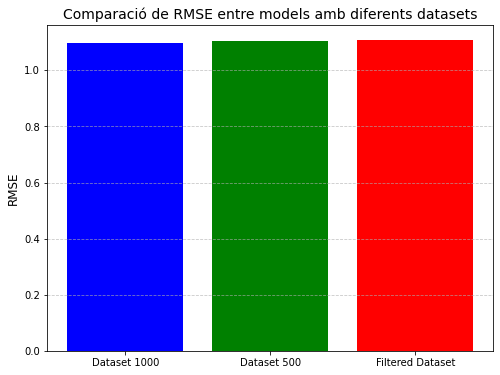

In [18]:
sim_options_cosinus = {
    'name': 'cosine',
    'user_based': True  # User-based similarity
}

# Model per dataset de 1000
reader = Reader()
data_1000 = Dataset.load_from_df(dataset_1000[['userId', 'productId', 'rating']], reader)
trainset_1000, testset_1000 = train_test_split(data_1000, test_size=0.2)

model_cosinus_1000 = KNNBasic(sim_options=sim_options_cosinus)
model_cosinus_1000.fit(trainset_1000)
predictions_cosinus_1000 = model_cosinus_1000.test(testset_1000)
rmse_cosinus_1000 = accuracy.rmse(predictions_cosinus_1000)

# Model per dataset de 500
data_500 = Dataset.load_from_df(dataset_500[['userId', 'productId', 'rating']], reader)
trainset_500, testset_500 = train_test_split(data_500, test_size=0.2)

model_cosinus_500 = KNNBasic(sim_options=sim_options_cosinus)
model_cosinus_500.fit(trainset_500)
predictions_cosinus_500 = model_cosinus_500.test(testset_500)
rmse_cosinus_500 = accuracy.rmse(predictions_cosinus_500)

# Model per dataset filtrat
data = Dataset.load_from_df(filtered_dataset[['userId', 'productId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

model_cosinus = KNNBasic(sim_options=sim_options_cosinus)
model_cosinus.fit(trainset)
predictions_cosinus = model_cosinus.test(testset)
rmse_cosinus = accuracy.rmse(predictions_cosinus)

# Comparar RMSE per als diferents datasets
models = ['Dataset 1000', 'Dataset 500', 'Filtered Dataset']
rmse_values = [rmse_cosinus_1000, rmse_cosinus_500, rmse_cosinus]

# Graficar comparació de RMSE
plt.figure(figsize=(8, 6))
plt.bar(models, rmse_values, color=['blue', 'green', 'red'])
plt.title('Comparació de RMSE entre models amb diferents datasets', fontsize=14)
plt.ylabel('RMSE', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


MAE:  0.7917
MAE:  0.7934
MAE:  0.7930


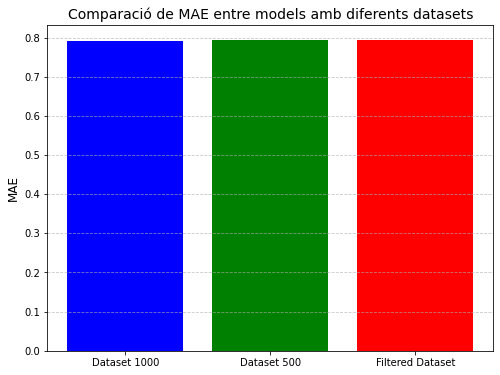

In [19]:

mae_cosinus_1000 = accuracy.mae(predictions_cosinus_1000)
mae_cosinus_500 = accuracy.mae(predictions_cosinus_500)
mae_cosinus = accuracy.mae(predictions_cosinus)

# Comparar MAE per als diferents datasets
models = ['Dataset 1000', 'Dataset 500', 'Filtered Dataset']
mae_values = [mae_cosinus_1000, mae_cosinus_500, mae_cosinus]

# Graficar comparació de MAE
plt.figure(figsize=(8, 6))
plt.bar(models, mae_values, color=['blue', 'green', 'red'])
plt.title('Comparació de MAE entre models amb diferents datasets', fontsize=14)
plt.ylabel('MAE', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
